In [29]:
import pandas as pd
import numpy as np
import seaborn as sns

In [30]:
raw_welfare = pd.read_spss('../Koweps_hpwc14_2019_beta2.sav')
welfare = raw_welfare.copy()

In [31]:
welfare = welfare.rename(
    columns={'h14_g3': 'sex',
             'h14_g4': 'birth',
             'h14_g10': 'marriage_type',
             'h14_g11': 'religion',
             'p1402_8aq1': 'income',
             'h14_eco9': 'code_job',
             'h14_reg7': 'code_region'
             }
)

In [32]:
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1)

In [33]:
welfare = welfare.assign(ageg=np.where(welfare['age'] < 30, 'young',
                    np.where(welfare['age'] <= 59, 'middle',
                    'old')))

In [34]:
agg_income = welfare.dropna(subset=['income']) \
    .groupby('ageg', as_index=False) \
    .agg(mean_income=('income', 'mean'))


<AxesSubplot:xlabel='ageg', ylabel='mean_income'>

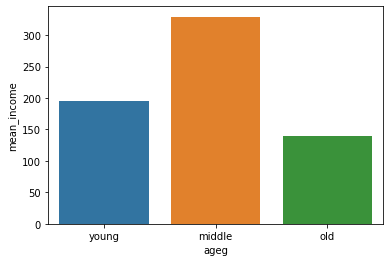

In [36]:
sns.barplot(data = agg_income, x = 'ageg', y = 'mean_income', order=['young', 'middle', 'old'])